In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import tslearn
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans;

# import and pre-processing

In [39]:
df = pd.read_csv('../dati/serie-storiche-ecommerce.csv', quotechar = "'", parse_dates = ['data'], decimal = ',')

In [40]:
def pivot_scale_and_fillna(df):
    """
    returns a pivoted version of the dataframe where the values 
    are scaled and null values substituted with zeros
    """
    scaler = StandardScaler()
    df_pivoted = pd.pivot(data = df, index = 'data', columns = 'settore', values = 'totale')
    col_names = [col_name for col_name in df_pivoted.columns]
    index_ = df_pivoted.index
    df_pivoted = df_pivoted.fillna(0)
    df_pivoted = pd.DataFrame(scaler.fit_transform(df_pivoted), columns = col_names, index = index_)
    return df_pivoted


In [41]:
df = pivot_scale_and_fillna(df).reset_index()

# graph

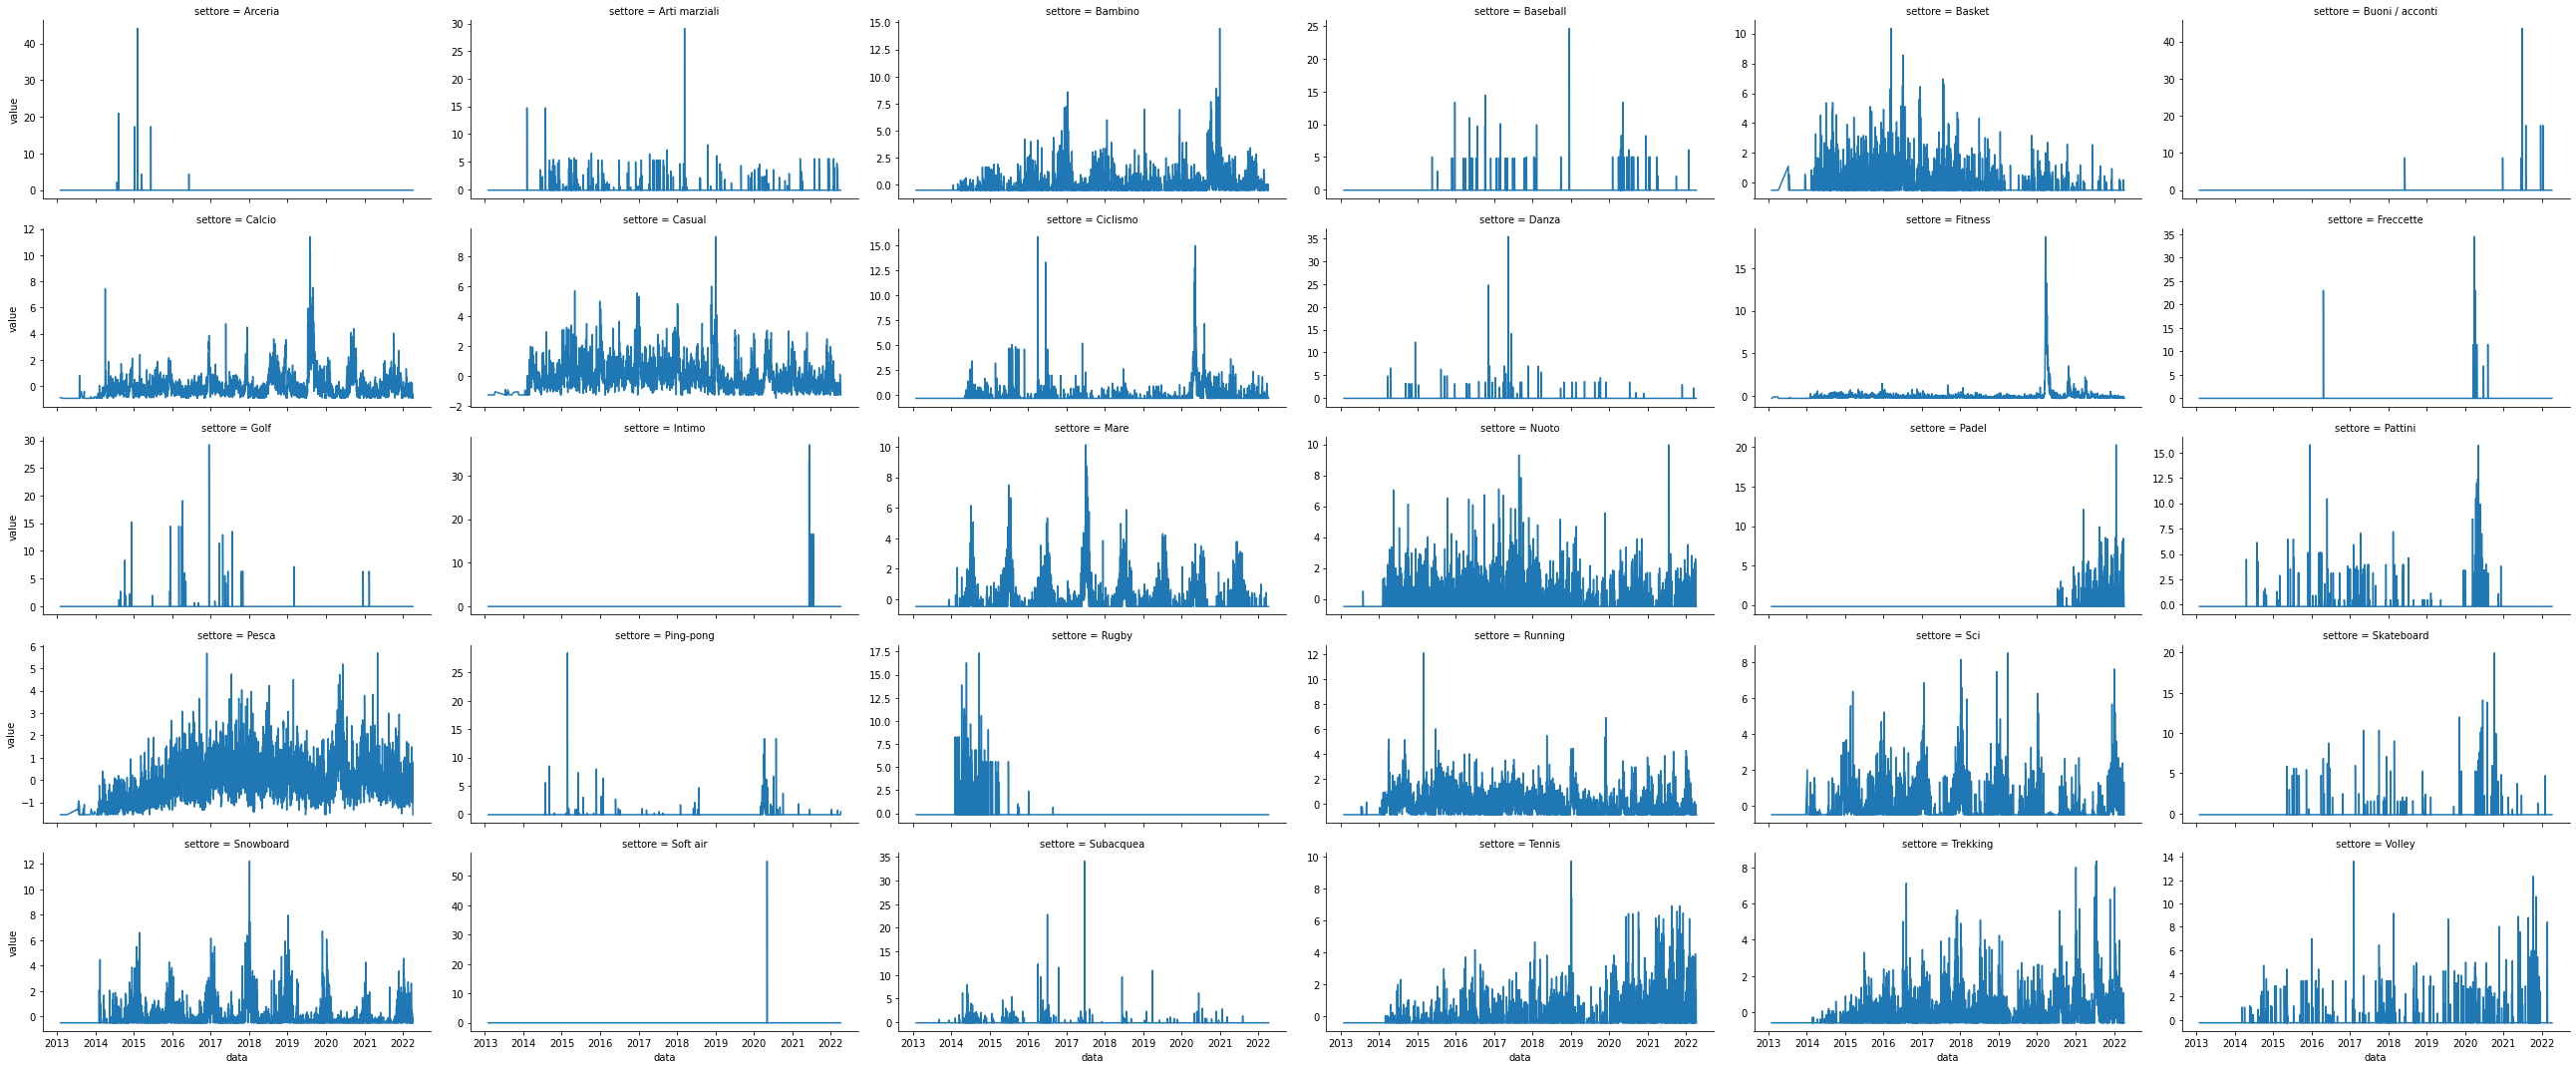

In [42]:
df_for_plot = df.melt(id_vars = 'data', var_name = 'settore')
facet = sns.FacetGrid(data = df_for_plot,  col = 'settore',  col_wrap = 6, sharey = False, height = 3, aspect= 2)
facet.map(sns.lineplot, 'data', 'value');

# clustering

In [54]:
df_for_clustering = df.drop(columns = ['data']).T.to_numpy()[..., np.newaxis]

In [61]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, max_iter_barycenter=5, random_state=0)

In [ ]:
cluster_predicted = km.fit_predict(df_for_clustering)

In [ ]:
def associate_sector_to_category(cluster_predicted, category, n_clusters):
    clusters = {}
    for n_cluster in range(n_clusters):
        clusters[n_cluster] = []
    for a in cluster_predicted:
        for b in clusters.keys():
          if a == b:
            clusters[a].append(category[a])
          else:
            pass
   return clusters

In [ ]:
def plot_clusters(n_clusters):
    fig, ax = plt.subplots(n_clusters/2, n_clusters/2, figsize(20,15))
    for clusters in range(n_clusters):
      ax[clusters].plot(km.clusters_centers_[clusters])